In [1]:
import yfinance as yf
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import talib

In [2]:
def plot_corr(series1, series2, title='', xlabel='', ylabel=''):
    corr = series1.corr(series2)
    plt.title(f'{title} (corr={corr:.3f})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(series1, series2, alpha=0.5, s=8, label=f'{corr:.3f}')
    plt.legend()

In [3]:
target = "4186.T" #東京応化
ohlcv_target =yf.download(target,start="2020-01-01",end="2024-12-31")

ohlcv_target

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,4186.T,4186.T,4186.T,4186.T,4186.T
Date,,,,,
2020-01-06,1272.095459,1279.667493,1255.437029,1258.465865,475500
2020-01-07,1300.868774,1302.383247,1273.609591,1275.124064,338400
2020-01-08,1282.696045,1291.782440,1266.037728,1285.724880,401400
2020-01-09,1303.897705,1325.099331,1300.868870,1319.041660,345000
2020-01-10,1308.440674,1308.440674,1296.325445,1296.325445,268500
...,...,...,...,...,...
2024-12-24,3465.173340,3552.447311,3457.239343,3547.488562,366700
2024-12-25,3457.239258,3475.090751,3402.693027,3471.123753,403400


In [26]:
ohlcv_target["ret_target"] = (ohlcv_target["Close"] - ohlcv_target["Open"]) / ohlcv_target["Open"]

In [27]:
SOX = "^SOX"
ohlcv_SOX = yf.download(SOX,start="2020-01-01",end="2024-12-31")
ohlcv_SOX

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^SOX,^SOX,^SOX,^SOX,^SOX
Date,,,,,
2020-01-02,1887.910034,1888.140015,1864.930054,1875.339966,0
2020-01-03,1853.979980,1869.719971,1848.650024,1850.819946,0
2020-01-06,1834.680054,1840.189941,1821.859985,1825.589966,0
2020-01-07,1867.280029,1875.609985,1845.500000,1852.729980,0
2020-01-08,1867.589966,1878.959961,1858.510010,1866.819946,0
...,...,...,...,...,...
2024-12-23,5118.750000,5124.189941,5013.750000,5013.750000,0
2024-12-24,5173.560059,5173.799805,5123.319824,5151.020020,0


In [28]:
ohlcv_SOX["ret_SOX"] = (ohlcv_SOX["Close"] - ohlcv_SOX["Open"]) / ohlcv_SOX["Open"]
ohlcv_SOX["ret_SOX_s1"] = ohlcv_SOX["ret_SOX"].shift(1)
ohlcv_SOX

Price,Close,High,Low,Open,Volume,ret_SOX,ret_SOX_s1
Ticker,^SOX,^SOX,^SOX,^SOX,^SOX,,
Date,,,,,,,
2020-01-02,1887.910034,1888.140015,1864.930054,1875.339966,0,0.006703,NaN
2020-01-03,1853.979980,1869.719971,1848.650024,1850.819946,0,0.001707,0.006703
2020-01-06,1834.680054,1840.189941,1821.859985,1825.589966,0,0.004979,0.001707
2020-01-07,1867.280029,1875.609985,1845.500000,1852.729980,0,0.007853,0.004979
2020-01-08,1867.589966,1878.959961,1858.510010,1866.819946,0,0.000412,0.007853
...,...,...,...,...,...,...,...
2024-12-23,5118.750000,5124.189941,5013.750000,5013.750000,0,0.020942,0.021070
2024-12-24,5173.560059,5173.799805,5123.319824,5151.020020,0,0.004376,0.020942


In [29]:
merge_df = ohlcv_target[["ret_target"]].merge(ohlcv_SOX[["ret_SOX_s1"]],on="Date",how="left")

In [30]:
merge_df

Price,ret_target,ret_SOX_s1
Ticker,,
Date,,
2020-01-06,0.001374,0.001707
2020-01-07,-0.010944,0.004979
2020-01-08,0.004178,0.007853
2020-01-09,0.007905,0.000412
2020-01-10,0.035111,-0.004483
...,...,...
2024-12-24,-0.007090,0.020942
2024-12-25,0.002877,NaN


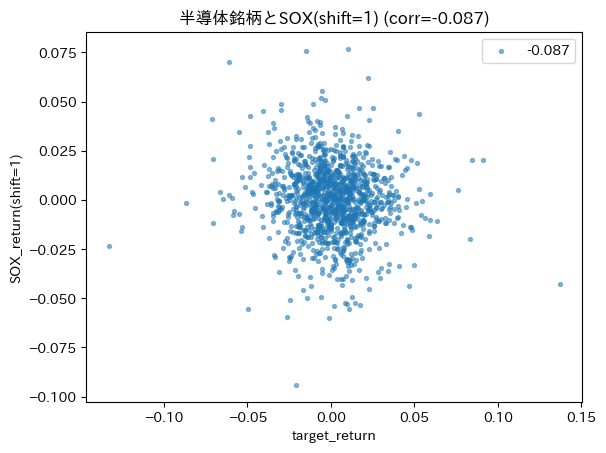

In [33]:
plot_corr(merge_df["ret_target"],merge_df["ret_SOX_s1"],title="半導体銘柄とSOX(shift=1)",xlabel="target_return",ylabel="SOX_return(shift=1)")